#Install python Libraries

In [0]:
!pip install prince==0.7.1
!pip install pandasql
!pip install lets-plot
!pip install pandas-profiling
!pip install missingno
!pip install graphviz
!pip install kneed
!pip install gower
!pip install kmodes
!pip install shap


You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-deb6a324-7cb6-47c6-9572-452c65da82b9/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 3.1 MB 11.4 MB/s 

*** WARNING: max output size exceeded, skipping output. ***

     |████████████████████████████████| 3.4 MB 5.6 MB/s 
     |████████████████████████████████| 332 kB 6.1 MB/s 
     |████████████████████████████████| 58 kB 6.5 MB/s 
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-deb6a324-7cb6-47c6-9572-452c65da82b9/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-deb6a324-7cb6-47c6-9572-452c65da82b9/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-deb6a324-7cb6-47c6-9572-452c65da82b9/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████

In [0]:
import pandas as pd
import sklearn.preprocessing as pp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import missingno as msno
import os
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from lets_plot import *
from lets_plot.mapping import as_discrete
from pandas.api.types import CategoricalDtype
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from plotly.subplots import make_subplots

LetsPlot.setup_html()

# ETL AND PROCESSING

## Load data

In [0]:
obesity_data= pd.read_csv(
    "https://raw.githubusercontent.com/keirahill/keirahill.github.io/master/Datasets/ObesityDataSet_raw_and_data_sinthetic.csv"
)

In [0]:
display(obesity_data)

Gender Age Height Weight family_history_with_overweight FAVC FCVC NCP CAEC SMOKE CH2O SCC FAF TUE CALC MTRANS NObeyesdad Female 21.0 1.62 64.0 yes no 2.0 3.0 Sometimes no 2.0 no 0.0 1.0 no Public_Transportation Normal_Weight Female 21.0 1.52 56.0 yes no 3.0 3.0 Sometimes yes 3.0 yes 3.0 0.0 Sometimes Public_Transportation Normal_Weight Male 23.0 1.8 77.0 yes no 2.0 3.0 Sometimes no 2.0 no 2.0 1.0 Frequently Public_Transportation Normal_Weight Male 27.0 1.8 87.0 no no 3.0 3.0 Sometimes no 2.0 no 2.0 0.0 Frequently Walking Overweight_Level_I Male 22.0 1.78 89.8 no no 2.0 1.0 Sometimes no 2.0 no 0.0 0.0 Sometimes Public_Transportation Overweight_Level_II Male 29.0 1.62 53.0 no yes 2.0 3.0 Sometimes no 2.0 no 0.0 0.0 Sometimes Automobile Normal_Weight Female 23.0 1.5 55.0 yes yes 3.0 3.0 Sometimes no 2.0 no 1.0 0.0 Sometimes Motorbike Normal_Weight Male 22.0 1.64 53.0 no no 2.0 3.0 Sometimes no 2.0 no 3.0 0.0 Sometimes Public_Transportation Normal_Weight Male 24.0 1.78 64.0 yes yes 3.0 3.0 Sometimes no 2.0 no 1.0 1.0 Frequently Public_Transportation Normal_Weight Male 22.0 1.72 68.0 yes yes 2.0 3.0 Sometimes no 2.0 no 1.0 1.0 no Public_Transportation Normal_Weight Male 26.0 1.85 105.0 yes yes 3.0 3.0 Frequently no 3.0 no 2.0 2.0 Sometimes Public_Transportation Obesity_Type_I Female 21.0 1.72 80.0 yes yes 2.0 3.0 Frequently no 2.0 yes 2.0 1.0 Sometimes Public_Transportation Overweight_Level_II Male 22.0 1.65 56.0 no no 3.0 3.0 Sometimes no 3.0 no 2.0 0.0 Sometimes Public_Transportation Normal_Weight Male 41.0 1.8 99.0 no yes 2.0 3.0 Sometimes no 2.0 no 2.0 1.0 Frequently Automobile Obesity_Type_I Male 23.0 1.77 60.0 yes yes 3.0 1.0 Sometimes no 1.0 no 1.0 1.0 Sometimes Public_Transportation Normal_Weight Female 22.0 1.7 66.0 yes no 3.0 3.0 Always no 2.0 yes 2.0 1.0 Sometimes Public_Transportation Normal_Weight Male 27.0 1.93 102.0 yes yes 2.0 1.0 Sometimes no 1.0 no 1.0 0.0 Sometimes Public_Transportation Overweight_Level_II Female 29.0 1.53 78.0 no yes 2.0 1.0 Sometimes no 2.0 no 0.0 0.0 no Automobile Obesity_Type_I Female 30.0 1.71 82.0 yes yes 3.0 4.0 Frequently yes 1.0 no 0.0 0.0 no Automobile Overweight_Level_II Female 23.0 1.65 70.0 yes no 2.0 1.0 Sometimes no 2.0 no 0.0 0.0 Sometimes Public_Transportation Overweight_Level_I Male 22.0 1.65 80.0 yes no 2.0 3.0 Sometimes no 2.0 no 3.0 2.0 no Walking Overweight_Level_II Female 52.0 1.69 87.0 yes yes 3.0 1.0 Sometimes yes 2.0 no 0.0 0.0 no Automobile Obesity_Type_I Female 22.0 1.65 60.0 yes yes 3.0 3.0 Sometimes no 2.0 no 1.0 0.0 Sometimes Automobile Normal_Weight Female 22.0 1.6 82.0 yes yes 1.0 1.0 Sometimes no 2.0 no 0.0 2.0 Sometimes Public_Transportation Obesity_Type_I Male 21.0 1.85 68.0 yes yes 2.0 3.0 Sometimes no 2.0 no 0.0 1.0 Sometimes Public_Transportation Normal_Weight Male 20.0 1.6 50.0 yes no 2.0 4.0 Frequently yes 2.0 no 3.0 2.0 no Public_Transportation Normal_Weight Male 21.0 1.7 65.0 yes yes 2.0 1.0 Frequently no 2.0 no 1.0 2.0 Always Walking Normal_Weight Female 23.0 1.6 52.0 no yes 2.0 4.0 Frequently no 2.0 no 2.0 1.0 Sometimes Automobile Normal_Weight Male 19.0 1.75 76.0 yes yes 3.0 3.0 Sometimes no 2.0 yes 3.0 1.0 Sometimes Public_Transportation Normal_Weight Male 23.0 1.68 70.0 no yes 2.0 3.0 Sometimes no 2.0 no 2.0 2.0 Frequently Walking Normal_Weight Male 29.0 1.77 83.0 no yes 1.0 4.0 Frequently no 3.0 no 0.0 1.0 no Motorbike Overweight_Level_I Female 31.0 1.58 68.0 yes no 2.0 1.0 Sometimes no 1.0 no 1.0 0.0 Sometimes Public_Transportation Overweight_Level_II Female 24.0 1.77 76.0 no no 2.0 3.0 Sometimes no 3.0 no 1.0 1.0 Sometimes Walking Normal_Weight Male 39.0 1.79 90.0 no no 2.0 1.0 Sometimes no 2.0 no 0.0 0.0 Sometimes Public_Transportation Overweight_Level_II Male 22.0 1.65 62.0 no yes 2.0 4.0 Frequently no 2.0 no 2.0 0.0 Sometimes Public_Transportation Normal_Weight Female 21.0 1.5 65.0 yes no 2.0 3.0 Sometimes no 2.0 no 2.0 2.0 Sometimes Public_Transportation Overweight_Level_II Female 22.0 1.56 49.0 no yes 2.0 3.0 Sometimes no 1.0 yes 2.0 0.0 no 

## check for nulls

In [0]:
# confirms no null data
obesity_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## rename columns for easier interpretation 

In [0]:
# rename columns 
obesity_data = obesity_data.rename(columns={
'Gender': 'gender_c',
'Age': 'age__y',
'Height': 'height__m',
'Weight': 'weight__kg',
'family_history_with_overweight':'family_history_with_overweight_c',
'FAVC': 'frequent_high_cal_food_c',
'FCVC': 'usually_veg_in_food_e',
'NCP': 'daily_main_meals_e',
'CAEC': 'food_between_meals_c',
'SMOKE': 'smoker_c',
'CH2O': 'daily_water_consumption_e',
'SCC': 'calorie_monitoring_c',
'FAF': 'physical_activity_frequency_e',
'TUE': 'tech_time_e',
'CALC': 'alcohol_frequency_c',
'MTRANS': 'transport_type_c',
'NObeyesdad': 'weight_class_c'

})

## check for duplicates

In [0]:
obesity_data.duplicated().sum()

Out[7]: 24

In [0]:
df1 = obesity_data[obesity_data.duplicated()]
df1.shape

Out[8]: (24, 17)

In [0]:
df1.head(df1.shape[0])

gender_c 
 age__y 
 height__m 
 weight__kg 
 family_history_with_overweight_c 
 frequent_high_cal_food_c 
 usually_veg_in_food_e 
 daily_main_meals_e 
 food_between_meals_c 
 smoker_c 
 daily_water_consumption_e 
 calorie_monitoring_c 
 physical_activity_frequency_e 
 tech_time_e 
 alcohol_frequency_c 
 transport_type_c 
 weight_class_c 
 
 
 
 
 98 
 Female 
 21.0 
 1.52 
 42.0 
 no 
 no 
 3.0 
 1.0 
 Frequently 
 no 
 1.0 
 no 
 0.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Insufficient_Weight 
 
 
 106 
 Female 
 25.0 
 1.57 
 55.0 
 no 
 yes 
 2.0 
 1.0 
 Sometimes 
 no 
 2.0 
 no 
 2.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Normal_Weight 
 
 
 174 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 179 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 184 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 209 
 Female 
 22.0 
 1.69 
 65.0 
 yes 
 yes 
 2.0 
 3.0 
 Sometimes 
 no 
 2.0 
 no 
 1.0 
 1.0 
 Sometimes 
 Public_Transportation 
 Normal_Weight 
 
 
 309 
 Female 
 16.0 
 1.66 
 58.0 
 no 
 no 
 2.0 
 1.0 
 Sometimes 
 no 
 1.0 
 no 
 0.0 
 1.0 
 no 
 Walking 
 Normal_Weight 
 
 
 460 
 Female 
 18.0 
 1.62 
 55.0 
 yes 
 yes 
 2.0 
 3.0 
 Frequently 
 no 
 1.0 
 no 
 1.0 
 1.0 
 no 
 Public_Transportation 
 Normal_Weight 
 
 
 467 
 Male 
 22.0 
 1.74 
 75.0 
 yes 
 yes 
 3.0 
 3.0 
 Frequently 
 no 
 1.0 
 no 
 1.0 
 0.0 
 no 
 Automobile 
 Normal_Weight 
 
 
 496 
 Male 
 18.0 
 1.72 
 53.0 
 yes 
 yes 
 2.0 
 3.0 
 Sometimes 
 no 
 2.0 
 no 
 0.0 
 2.0 
 Sometimes 
 Public_Transportation 
 Insufficient_Weight 
 
 
 527 
 Female 
 21.0 
 1.52 
 42.0 
 no 
 yes 
 3.0 
 1.0 
 Frequently 
 no 
 1.0 
 no 
 0.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Insufficient_Weight 
 
 
 659 
 Female 
 21.0 
 1.52 
 42.0 
 no 
 yes 
 3.0 
 1.0 
 Frequently 
 no 
 1.0 
 no 
 0.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Insufficient_Weight 
 
 
 663 
 Female 
 21.0 
 1.52 
 42.0 
 no 
 yes 
 3.0 
 1.0 
 Frequently 
 no 
 1.0 
 no 
 0.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Insufficient_Weight 
 
 
 763 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 764 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 824 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 830 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 831 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 832 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 833 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 834 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 921 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 922 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I 
 
 
 923 
 Male 
 21.0 
 1.62 
 70.0 
 no 
 yes 
 2.0 
 1.0 
 no 
 no 
 3.0 
 no 
 1.0 
 0.0 
 Sometimes 
 Public_Transportation 
 Overweight_Level_I

dont know if these are duplicates or not so will leave in dataset

In [0]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gender_c                          2111 non-null   object 
 1   age__y                            2111 non-null   float64
 2   height__m                         2111 non-null   float64
 3   weight__kg                        2111 non-null   float64
 4   family_history_with_overweight_c  2111 non-null   object 
 5   frequent_high_cal_food_c          2111 non-null   object 
 6   usually_veg_in_food_e             2111 non-null   float64
 7   daily_main_meals_e                2111 non-null   float64
 8   food_between_meals_c              2111 non-null   object 
 9   smoker_c                          2111 non-null   object 
 10  daily_water_consumption_e         2111 non-null   float64
 11  calorie_monitoring_c              2111 non-null   object 
 12  physic

## inspect categorical features

In [0]:
# Inspect the categorical features in the data
# reference: (Fullegar, 2024)
features = list(obesity_data)
features.remove('age__y')
features.remove('height__m')
features.remove('weight__kg')
features.remove('usually_veg_in_food_e')
features.remove('daily_main_meals_e')
features.remove('daily_water_consumption_e')
features.remove('physical_activity_frequency_e')
features.remove('tech_time_e')
for i in features:
  j = obesity_data[i].value_counts()
  print("---- %s ---" % i)
  print(j)

---- gender_c ---
Male      1068
Female    1043
Name: gender_c, dtype: int64
---- family_history_with_overweight_c ---
yes    1726
no      385
Name: family_history_with_overweight_c, dtype: int64
---- frequent_high_cal_food_c ---
yes    1866
no      245
Name: frequent_high_cal_food_c, dtype: int64
---- food_between_meals_c ---
Sometimes     1765
Frequently     242
Always          53
no              51
Name: food_between_meals_c, dtype: int64
---- smoker_c ---
no     2067
yes      44
Name: smoker_c, dtype: int64
---- calorie_monitoring_c ---
no     2015
yes      96
Name: calorie_monitoring_c, dtype: int64
---- alcohol_frequency_c ---
Sometimes     1401
no             639
Frequently      70
Always           1
Name: alcohol_frequency_c, dtype: int64
---- transport_type_c ---
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: transport_type_c, dtype: int64
---- weight_class_c ---
Obesit

In [0]:
# reference: (The Py4DS Community, 2023)
# sets objects to categorical for ordering 
obesity_data["food_between_meals_c"] = obesity_data["food_between_meals_c"].astype(
    CategoricalDtype(
        categories=["no", "Sometimes", "Frequently", "Always"], ordered=True
    )
)
obesity_data["alcohol_frequency_c"] = obesity_data["alcohol_frequency_c"].astype(
    CategoricalDtype(
        categories=["no", "Sometimes", "Frequently", "Always"], ordered=True
    )
)
obesity_data["weight_class_c"] = obesity_data["weight_class_c"].astype(
    CategoricalDtype(
        categories=["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"], ordered=True
    )
)

according to the documentation the following fields are categorical and have already been encoded to numbers. this data is showing as float and should be integer, will therfore explore the distributions of these features

In [0]:

categorical_encoded = obesity_data[['usually_veg_in_food_e', 'daily_main_meals_e', 'daily_water_consumption_e', 'physical_activity_frequency_e', 'tech_time_e']]

In [0]:
# Reference: (Stack Overflow, 2020)
# This code has been adapted multiple times across the notebook where multiple plots are required


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# function to create bar charts 
def plot_bar_charts(df, collist, numcols, tickang, titletext):
    # list of columns to plot
    columns = [col for col in df.columns if col  in collist]
    
    # determine the layout of the subplots to be x columns and rows determined by number of columns in dataset
    num_cols = numcols
    num_rows = (len(columns) + num_cols - 1) // num_cols
    
    # Create subplots
    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=columns, vertical_spacing=0.15)
    
    # Plot each measure as a histogram using Plotly
    for i, col in enumerate(columns):
        row = i // num_cols + 1
        col_num = i % num_cols + 1
        bar_fig = px.histogram(df.sort_values([col]), x=col,histnorm="percent", color_discrete_sequence=['#00586D'])
        
        for trace in bar_fig['data']:
            fig.add_trace(trace, row=row, col=col_num)

        for i in fig['layout']['annotations']: ## change title font size Reference: (GitHub, 2018)
            i['font'] = dict(size=10)

    # update full plot        
    fig.update_layout(height=num_rows * 350, width=num_cols * 350, showlegend=False, font_size=10, template="plotly_white", title=titletext)
    fig.update_xaxes(tickangle = tickang)
    fig.for_each_trace(lambda trace: trace.update(bingroup=trace['xaxis'])) # Reference: (GitHub, 2023)
    fig.show()

In [0]:
plot_bar_charts(obesity_data, categorical_encoded, 3, 0, 'Distributions of encoded categorical features')

the histograms show 3 main responses for all categories other than physical activity which has 4. the float numbers may have been created through SMOTE so these values will be rounded to put back into the correct number of responses for each feature so they can be interpreted back to the original 

In [0]:

obesity_data['usually_veg_in_food_e'] = obesity_data['usually_veg_in_food_e'].round(0).astype(int)
obesity_data['daily_water_consumption_e'] = obesity_data['daily_water_consumption_e'].round(0).astype(int)
obesity_data['daily_main_meals_e'] = obesity_data['daily_main_meals_e'].apply(lambda x: 1 if x < 2 else (3 if x < 3.5 else 4)).astype(int)
obesity_data['physical_activity_frequency_e'] = obesity_data['physical_activity_frequency_e'].round(0).astype(int)
obesity_data['tech_time_e'] = obesity_data['tech_time_e'].round(0).astype(int)

In [0]:
# Mapping dictionaries
usually_veg_in_food_mapping = {1: 'Never', 2: 'Sometimes', 3: 'Always'}
daily_main_meals_mapping = {1: '1-2', 3: '3', 4: 'More than 3'}
daily_water_consumption_mapping = {1: 'Less than 1L', 2: '1 to 2L', 3: 'More than 2L'}
physical_activity_frequency_mapping = {0: 'None', 1: '1-2 days', 2: '2-4 days', 3: '4-5 days'}
tech_time_mapping = {0: '0-2 hours', 1: '3-5 hours', 2: 'more than 5 hours'}

In [0]:
# create additional columns in data with text value for visualisations
obesity_data["usually_veg_in_food_c"] = obesity_data["usually_veg_in_food_e"].map(usually_veg_in_food_mapping)
obesity_data["daily_main_meals_c"] = obesity_data["daily_main_meals_e"].map(daily_main_meals_mapping)
obesity_data["daily_water_consumption_c"] = obesity_data["daily_water_consumption_e"].map(daily_water_consumption_mapping)
obesity_data["physical_activity_frequency_c"] = obesity_data["physical_activity_frequency_e"].map(physical_activity_frequency_mapping)
obesity_data["tech_time_c"] = obesity_data["tech_time_e"].map(tech_time_mapping)

In [0]:
# sets objects to categorical for ordering 
obesity_data["usually_veg_in_food_c"] = obesity_data["usually_veg_in_food_c"].astype(
    CategoricalDtype(
        categories=['Never',  'Sometimes', 'Always'], ordered=True
    )
)
obesity_data["daily_water_consumption_c"] = obesity_data["daily_water_consumption_c"].astype(
    CategoricalDtype(
        categories=['Less than 1L',  '1 to 2L',  'More than 2L'], ordered=True
    )
)
obesity_data["daily_main_meals_c"] = obesity_data["daily_main_meals_c"].astype(
    CategoricalDtype(
        categories=['1-2', '3', 'More than 3'], ordered=True
    )
)
obesity_data["physical_activity_frequency_c"] = obesity_data["physical_activity_frequency_c"].astype(
    CategoricalDtype(
        categories=['None',  '1-2 days',  '2-4 days',  '4-5 days'], ordered=True
    )
)
obesity_data["tech_time_c"] = obesity_data["tech_time_c"].astype(
    CategoricalDtype(
        categories=['0-2 hours',  '3-5 hours',  'more than 5 hours'], ordered=True
    )
)

In [0]:
#check data types
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   gender_c                          2111 non-null   object  
 1   age__y                            2111 non-null   float64 
 2   height__m                         2111 non-null   float64 
 3   weight__kg                        2111 non-null   float64 
 4   family_history_with_overweight_c  2111 non-null   object  
 5   frequent_high_cal_food_c          2111 non-null   object  
 6   usually_veg_in_food_e             2111 non-null   int64   
 7   daily_main_meals_e                2111 non-null   int64   
 8   food_between_meals_c              2111 non-null   category
 9   smoker_c                          2111 non-null   object  
 10  daily_water_consumption_e         2111 non-null   int64   
 11  calorie_monitoring_c              2111 non-null   object

## encode categorical features

### ordinal encoding

In [0]:
# reference: (Stack Overflow, 2022)
# applies ordinal encoding to ordinal features
from sklearn import preprocessing
OrdinalEncoder = preprocessing.OrdinalEncoder(categories=[["no", "Sometimes", "Frequently", "Always"]])
obesity_data['food_between_meals_e'] = OrdinalEncoder.fit_transform(obesity_data[['food_between_meals_c']])
obesity_data['alcohol_frequency_e'] = OrdinalEncoder.fit_transform(obesity_data[['alcohol_frequency_c']])


OrdinalEncoder2 = preprocessing.OrdinalEncoder(categories=[["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]])
obesity_data['weight_class_e'] = OrdinalEncoder2.fit_transform(obesity_data[['weight_class_c']])


In [0]:
print(f"Unique Values from 3 Columns:\
{pd.concat([obesity_data['weight_class_e'],obesity_data['weight_class_c']]).unique()}")

Unique Values from 3 Columns:[1.0 2.0 3.0 4.0 0.0 5.0 6.0 'Normal_Weight' 'Overweight_Level_I'
 'Overweight_Level_II' 'Obesity_Type_I' 'Insufficient_Weight'
 'Obesity_Type_II' 'Obesity_Type_III']


### dummies encoding

In [0]:
# function for one hot encoding nominal categorical features
def applydummies(df, col, drop):
    dummies = pd.get_dummies(df[col], prefix=col, dtype='int',drop_first=drop)
    df = pd.concat([df, dummies], axis=1)
    return df

In [0]:
obesity_data = applydummies(obesity_data, 'gender_c', True) # drop one column for features with only 2 responses 
obesity_data = applydummies(obesity_data, 'family_history_with_overweight_c', True)
obesity_data = applydummies(obesity_data, 'frequent_high_cal_food_c', True)
obesity_data = applydummies(obesity_data, 'smoker_c', True)
obesity_data = applydummies(obesity_data, 'calorie_monitoring_c', True)
obesity_data = applydummies(obesity_data, 'transport_type_c', False) # dont drop first column as easier ton interpret with all responses

## add BMI feature

In [0]:
# add bmi which is what weight_classificaion is based on. adding this as could then do linear regression

obesity_data = (
    obesity_data.assign(
bmi=lambda row: row['weight__kg'] / (row['height__m'] ** 2)))

In [0]:
# add combined weight class with just 4 features for visualisation purposes
def weight_class_comb(weight_class):
    if weight_class in ['Insufficient_Weight']:
        return "Underweight"
    elif weight_class in ['Normal_Weight']:
        return "Healthy"
    elif weight_class in ['Overweight_Level_I', 'Overweight_Level_II', 'Overweight_Level_III']:
        return "Overweight"
    else:
        return "Obese" 

obesity_data['weight_class_short_c'] = obesity_data['weight_class_c'].apply(weight_class_comb)


In [0]:
obesity_data["weight_class_short_c"] = obesity_data["weight_class_short_c"].astype(
    CategoricalDtype(
        categories=['Underweight', 'Healthy', 'Overweight', 'Obese'], ordered=True
    )
)

# DATA ANALYSIS

##  explore distributions of continuous data

In [0]:
obesity_data.describe().T

count 
 mean 
 std 
 min 
 25% 
 50% 
 75% 
 max 
 
 
 
 
 age__y 
 2111.0 
 24.312600 
 6.345968 
 14.000000 
 19.947192 
 22.777890 
 26.000000 
 61.000000 
 
 
 height__m 
 2111.0 
 1.701677 
 0.093305 
 1.450000 
 1.630000 
 1.700499 
 1.768464 
 1.980000 
 
 
 weight__kg 
 2111.0 
 86.586058 
 26.191172 
 39.000000 
 65.473343 
 83.000000 
 107.430682 
 173.000000 
 
 
 usually_veg_in_food_e 
 2111.0 
 2.423496 
 0.583905 
 1.000000 
 2.000000 
 2.000000 
 3.000000 
 3.000000 
 
 
 daily_main_meals_e 
 2111.0 
 2.696352 
 0.852752 
 1.000000 
 3.000000 
 3.000000 
 3.000000 
 4.000000 
 
 
 daily_water_consumption_e 
 2111.0 
 2.014685 
 0.688616 
 1.000000 
 2.000000 
 2.000000 
 2.000000 
 3.000000 
 
 
 physical_activity_frequency_e 
 2111.0 
 1.006632 
 0.895462 
 0.000000 
 0.000000 
 1.000000 
 2.000000 
 3.000000 
 
 
 tech_time_e 
 2111.0 
 0.664614 
 0.674009 
 0.000000 
 0.000000 
 1.000000 
 1.000000 
 2.000000 
 
 
 food_between_meals_e 
 2111.0 
 1.140692 
 0.468543 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 3.000000 
 
 
 alcohol_frequency_e 
 2111.0 
 0.731407 
 0.515498 
 0.000000 
 0.000000 
 1.000000 
 1.000000 
 3.000000 
 
 
 weight_class_e 
 2111.0 
 3.112269 
 1.985062 
 0.000000 
 1.000000 
 3.000000 
 5.000000 
 6.000000 
 
 
 gender_c_Male 
 2111.0 
 0.505921 
 0.500083 
 0.000000 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 family_history_with_overweight_c_yes 
 2111.0 
 0.817622 
 0.386247 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 frequent_high_cal_food_c_yes 
 2111.0 
 0.883941 
 0.320371 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 smoker_c_yes 
 2111.0 
 0.020843 
 0.142893 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 
 
 calorie_monitoring_c_yes 
 2111.0 
 0.045476 
 0.208395 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 
 
 transport_type_c_Automobile 
 2111.0 
 0.216485 
 0.411946 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 
 
 transport_type_c_Bike 
 2111.0 
 0.003316 
 0.057502 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 
 
 transport_type_c_Motorbike 
 2111.0 
 0.005211 
 0.072015 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 
 
 transport_type_c_Public_Transportation 
 2111.0 
 0.748460 
 0.434001 
 0.000000 
 0.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 transport_type_c_Walking 
 2111.0 
 0.026528 
 0.160737 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 
 
 bmi 
 2111.0 
 29.700159 
 8.011337 
 12.998685 
 24.325802 
 28.719089 
 36.016501 
 50.811753

In [0]:
obesity_data_numeric = obesity_data[['age__y', 'height__m', 'weight__kg', 'bmi']]

right skewed for age, low numbers over 40 which may impact model, however will not remove these as likely to be true data

Out[30]: <seaborn.axisgrid.PairGrid at 0x7fe4573937c0>

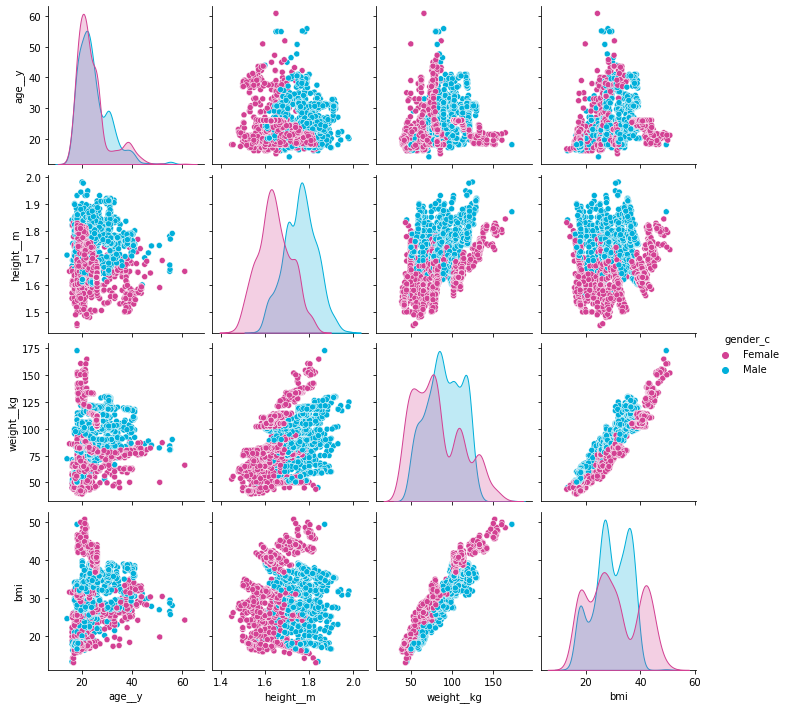

In [0]:
sns.pairplot(obesity_data[['age__y', 'height__m', 'weight__kg', 'bmi', 'gender_c']], hue='gender_c', palette={'Female':'#D34193', 'Male':'#00AFDA'})

Out[31]: Text(0.5, 1.0, 'Correlation of Variables')

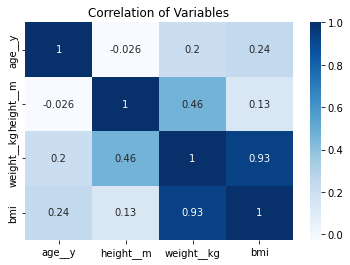

In [0]:
sns.heatmap(obesity_data_numeric.corr(), annot = True, cmap='Blues').set_title('Correlation of Variables')

high correlation as expected between weight and bmi, will drop weight from the model when BMI used

## BMI vs weight class

In [0]:
%python
fig = px.box(obesity_data.sort_values(by="weight_class_c"), x="weight_class_c", y="bmi", color= "weight_class_c", notched=True, color_discrete_sequence=px.colors.qualitative.Pastel, hover_name="weight_class_c")
fig.update_layout(width=1000, height=500, title='Box Plot of BMI by Weight Class', xaxis_title='weight class_c', yaxis_title='bmi', template="plotly_white", showlegend=False)
fig.show()

box plots show that bmi is the measure used to create the class weight, however the bandings are not exact, this is likely down to the synthetic data, an alternative would be to create BMI based on the weight class

## distributions of categorical features

In [0]:
plot_bar_charts(obesity_data, ['gender_c', 'family_history_with_overweight_c', 'frequent_high_cal_food_c', 'food_between_meals_c', 'smoker_c', 'calorie_monitoring_c', 'alcohol_frequency_c', 'transport_type_c', 'weight_class_c', 'usually_veg_in_food_c', 'daily_main_meals_c', 'daily_water_consumption_c', 'physical_activity_frequency_c', 'tech_time_c'], 4, 90, 'Distributions of categorical features')


In [0]:
## box plot function

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_box_charts(df, collist):
    # list of columns to plot
    columns = [col for col in df.columns if col in collist]
    
    # determine the layout of the subplots to be x columns and rows determined by number of columns in dataset

    num_cols = 4
    num_rows = (len(columns) + num_cols - 1) // num_cols
    
    # Create subplots
    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=columns, vertical_spacing=0.15)
    
    # Plot each measure as a box plot using Plotly
    for i, col in enumerate(columns):
        row = i // num_cols + 1
        col_num = i % num_cols + 1
        box_fig = px.box(df.sort_values(col), x=col, y="bmi",  notched=True, color_discrete_sequence=['#00586D'])
        
        for trace in box_fig['data']:
            fig.add_trace(trace, row=row, col=col_num)

        for i in fig['layout']['annotations']: 
            i['font'] = dict(size=10)

    # update full plot         
    fig.update_layout(height=num_rows * 350, width=num_cols * 350, showlegend=False, font_size=10, template="plotly_white", title='Box Plots of Categorical Variables by BMI')
    fig.update_xaxes(tickangle = 90)
    fig.show()

In [0]:
plot_box_charts(obesity_data, ['gender_c', 'family_history_with_overweight_c', 'frequent_high_cal_food_c', 'food_between_meals_c', 'smoker_c', 'calorie_monitoring_c', 'alcohol_frequency_c', 'transport_type_c', 'usually_veg_in_food_c', 'daily_main_meals_c', 'daily_water_consumption_c', 'physical_activity_frequency_c', 'tech_time_c'])

#CLUSTERING

## K-Prototypes clustering

In [0]:
# list categorical and numeric features to be used in clustering, ordinal catergorical features have been set as numeric
featurescat = ['gender_c_Male',  'family_history_with_overweight_c_yes', 'frequent_high_cal_food_c_yes', 'smoker_c_yes', 'calorie_monitoring_c_yes', 'transport_type_c_Automobile', 'transport_type_c_Bike', 'transport_type_c_Motorbike', 'transport_type_c_Public_Transportation', 'transport_type_c_Walking']
featuresnumeric= ['age__y', 'height__m', 'weight__kg', 'usually_veg_in_food_e', 'daily_main_meals_e', 'daily_water_consumption_e', 'physical_activity_frequency_e', 'tech_time_e', 'food_between_meals_e', 'alcohol_frequency_e']

In [0]:
# normalise numeric data through minmax scaling
scaler = pp.MinMaxScaler()
obesity_data_clusters = obesity_data
obesity_data_clusterscat = obesity_data_clusters[featurescat]   # categorical features
obesity_data_clustersnum = obesity_data_clusters[featuresnumeric]   # numeric features
obesity_data_clustersnum_scaled = scaler.fit_transform(obesity_data_clustersnum) # normalise the numeric features between 0 and 1

obesity_data_clustersnum_scaled = pd.DataFrame(obesity_data_clustersnum_scaled, columns=featuresnumeric) # create a pandas dataframe of normalised numeric features
obesity_data_combined = pd.concat([obesity_data_clusterscat, obesity_data_clustersnum_scaled], axis=1) # combine the categorical and normalised numeric features into one dataframe

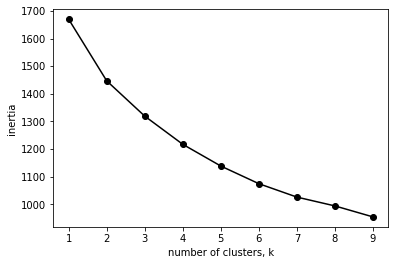

In [0]:
# Elbow method to find the optimal number of clusters to use
# References: (Dmitriy, 2019; Ruberts, 2020) 

from kmodes.kprototypes import KPrototypes
# Convert column names to indices which are required for k-protoypes
categorical_indices = [obesity_data_combined.columns.get_loc(col) for col in featurescat]

random_seed = 42 # set ramdom seed for reproducability

ks = range(1, 10) # range of clusters to test
inertias = [] # create an empty df to append values to
# loop through each value of k
for k in ks:
    # Create a Kprotoypes instance with k clusters
    model = KPrototypes(n_clusters=k, random_state=random_seed)
    
    # Fit model to samples
    model.fit(obesity_data_combined,  categorical = categorical_indices )
    
    # Append the inertia to the list of inertias
    inertias.append(model.cost_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
from kneed import KneeLocator

# knee locator confirms optimal number of clusters
kl = KneeLocator(ks, inertias, curve='convex', direction='decreasing')
kl.elbow
nclust = kl.elbow

# create the model to the optimal number of clusters
kproto = KPrototypes(n_clusters=nclust, random_state=42)

# fit the model
pred_kprotp = kproto.fit_predict(obesity_data_combined, categorical = categorical_indices )

# add cluster column to the unscaled dataset
obesity_data_clusters['cluster'] = pred_kprotp

In [0]:
# view the average values of each feature for each cluster
obesity_data_clusters.groupby('cluster').mean()

age__y 
 height__m 
 weight__kg 
 usually_veg_in_food_e 
 daily_main_meals_e 
 daily_water_consumption_e 
 physical_activity_frequency_e 
 tech_time_e 
 food_between_meals_e 
 alcohol_frequency_e 
 weight_class_e 
 gender_c_Male 
 family_history_with_overweight_c_yes 
 frequent_high_cal_food_c_yes 
 smoker_c_yes 
 calorie_monitoring_c_yes 
 transport_type_c_Automobile 
 transport_type_c_Bike 
 transport_type_c_Motorbike 
 transport_type_c_Public_Transportation 
 transport_type_c_Walking 
 bmi 
 
 
 cluster 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 23.309804 
 1.704888 
 97.846879 
 2.828346 
 2.861417 
 2.590551 
 1.091339 
 0.485039 
 1.064567 
 0.869291 
 3.943307 
 0.294488 
 0.853543 
 0.891339 
 0.014173 
 0.048819 
 0.069291 
 0.001575 
 0.003150 
 0.907087 
 0.018898 
 33.441126 
 
 
 1 
 21.543456 
 1.729267 
 79.710152 
 2.022430 
 2.835514 
 2.065421 
 1.160748 
 1.396262 
 1.196262 
 0.693458 
 2.353271 
 0.742056 
 0.803738 
 0.899065 
 0.022430 
 0.037383 
 0.078505 
 0.003738 
 0.001869 
 0.871028 
 0.044860 
 26.464886 
 
 
 2 
 29.834679 
 1.734235 
 89.989705 
 2.135776 
 2.887931 
 1.909483 
 1.025862 
 0.181034 
 1.107759 
 0.750000 
 3.193966 
 0.793103 
 0.890086 
 0.909483 
 0.023707 
 0.023707 
 0.696121 
 0.008621 
 0.010776 
 0.262931 
 0.021552 
 29.868489 
 
 
 3 
 23.381830 
 1.634789 
 75.996323 
 2.614256 
 2.134172 
 1.293501 
 0.702306 
 0.553459 
 1.211740 
 0.572327 
 2.777778 
 0.243187 
 0.714885 
 0.832285 
 0.025157 
 0.071279 
 0.100629 
 0.000000 
 0.006289 
 0.872117 
 0.020964 
 28.184963

In [0]:
# bar chart to show number of records per cluster
cluster_counts = obesity_data_clusters.groupby('cluster').size().reset_index(name = 'counts')

fig = px.bar(cluster_counts, x = "cluster", y = "counts", text="counts", color_discrete_sequence=['#00586D'])
fig.update_layout(width=1000, height=500, title='number of record per cluster', template="plotly_white")
fig.update_xaxes(type='category')
fig.show()

## Factor analysis to visualise clusters

In [0]:
# categorical features before encoding used as FAMD requires a mix of categorical and numeric features
featurescat_short = ['gender_c', 'family_history_with_overweight_c', 'frequent_high_cal_food_c', 'smoker_c', 'calorie_monitoring_c',  'transport_type_c']

In [0]:
# create data frame with numeric features and categorical features
allfeatures = featurescat_short + featuresnumeric
obesity_data_combined_FAMD  = obesity_data_clusters[allfeatures]   

In [0]:
# factor analysis using FAMD
# References: (Dmitriy, 2019; Mahmood, Md Sohel, 2021)
from prince import FAMD
columns = obesity_data_combined_FAMD.columns
num_features = len(columns) 

# Create a FAMD instance
famd = FAMD(n_components =25, random_state = 42)
famdComponents = famd.fit_transform(obesity_data_combined_FAMD)

# Plot the explained variances
famdfeatures = range(famd.n_components)

fig = px.bar(x = famdfeatures, y = famd.explained_inertia_ , orientation='v', color_discrete_sequence=['#00586D'])
fig.update_layout(width=1000, height=500, title='Explained Variance by FAMD features', xaxis_title='FAMD features', yaxis_title='variance %', template="plotly_white")
fig.show()

In [0]:
# fit FAMD on the first 3 components

famd = FAMD(n_components =3, random_state = 42)
famdComponents = famd.fit_transform(obesity_data_combined_FAMD)
principalDf = pd.DataFrame(famdComponents)

# add the FAMD components to the dataframe
obesity_data_clusters['FAMD1'] = principalDf[0]
obesity_data_clusters['FAMD2'] = principalDf[1]
obesity_data_clusters['FAMD3'] = principalDf[2]

In [0]:
cluster_map={
                0: '#00456B',
                1: '#00AFDA',
                2: '#21A498',
                3: '#B4E100'
                }

In [0]:
px.scatter_3d(obesity_data_clusters, x='FAMD1', y='FAMD2', z='FAMD3', color='cluster', color_discrete_map=cluster_map, title='3D scatter plot of FAMD components by cluster',  template="plotly_white")

## continuous features per cluster

In [0]:

# view distribution of clusters by BMI 
df = obesity_data_clusters

fig = px.box(df, x="cluster", y="bmi", color="cluster", notched=True, color_discrete_map=cluster_map)
fig.update_layout(width=1000, height=500, title='Box Plot of BMI by Cluster', xaxis_title='cluster', yaxis_title='bmi', template="plotly_white", showlegend=False)
fig.show()



In [0]:
# Reference: (Plotly Community Forum, 2022)
# view distribution of clusters by Weight Class

df = obesity_data_clusters

fig1 = px.histogram(df.sort_values(["weight_class_short_c", "cluster"]), x="weight_class_short_c", color="cluster", barmode="group", histnorm="percent", color_discrete_map=cluster_map)
fig2 = px.histogram(df.sort_values(["weight_class_short_c"]), x="weight_class_short_c", barmode="group", histnorm="percent", color_discrete_sequence=['#00586D'])


fig = make_subplots(
    rows=1, cols=2,
    shared_yaxes=True,
    vertical_spacing=0.02,
    subplot_titles=("Weight Class (combined) % distribution by cluster", "Weight Class (combined) % distribution")
    )

# add each trace to its specific subplot
for i in fig1.data :
    fig.add_trace(i, row=1, col=1)

for i in fig2.data :    
    fig.add_trace(i, row=1, col=2)


fig.update_layout(showlegend=False, font_size=10, template="plotly_white")
fig.for_each_trace(lambda trace: trace.update(bingroup=trace['xaxis'])) 
fig.show()

In [0]:
## box plot function

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_box_charts_clus(df, collist, clus):
    # list of columns to plot
    columns = [col for col in df.columns if col in collist]
    
    # determine the layout of the subplots to be x columns and rows determined by number of columns in dataset
    num_cols = 3
    num_rows = (len(columns) + num_cols - 1) // num_cols
    
    # Create subplots
    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=columns, vertical_spacing=0.1)
    
    # Plot each measure as a box plot using Plotly
    for i, col in enumerate(columns):
        row = i // num_cols + 1
        col_num = i % num_cols + 1
        box_fig = px.box(df, x=clus, y=col, color=clus, notched=True, color_discrete_map=cluster_map, hover_data= [clus])
        
        for trace in box_fig['data']:
            fig.add_trace(trace, row=row, col=col_num)

        for i in fig['layout']['annotations']: 
            i['font'] = dict(size=10)

    # update full plot          
    fig.update_layout(height=num_rows * 350, width=num_cols * 350, showlegend=False, font_size=10, template="plotly_white", title='Box Plots of Continuous Features by Cluster')
    fig.show()

In [0]:
plot_box_charts_clus(obesity_data_clusters, ['age__y', 'height__m', 'weight__kg'], "cluster")

## categorical features per cluster

In [0]:
def plot_bar_charts2(df, collist, clus):
    # list of columns to plot
    columns = [col for col in df.columns if col in collist]
    
    # determine the layout of the subplots to be x columns and rows determined by number of columns in dataset
    num_cols = 3
    num_rows = (len(columns) + num_cols - 1) // num_cols
    
    # Create subplots
    fig = make_subplots(rows=num_rows, cols=num_cols, subplot_titles=columns, vertical_spacing=0.12)
    
    # Plot each measure as a bar chart using Plotly
    for i, col in enumerate(columns):
        row = i // num_cols + 1
        col_num = i % num_cols + 1
        bar_fig = px.histogram(df.sort_values([col, clus]), x=col, color=clus, barmode="group", histnorm="percent", color_discrete_map=cluster_map)
        
        for trace in bar_fig['data']:
            fig.add_trace(trace, row=row, col=col_num)
            
        for i in fig['layout']['annotations']:  
            i['font'] = dict(size=10)

    # update full plot          
    fig.update_layout(height=num_rows * 300, width=num_cols * 350, showlegend=False, font_size=10, template="plotly_white", title='% Distributions of categorical features by Cluster')
    fig.update_xaxes(showticklabels=True, tickangle=90, type='category')
    fig.update_yaxes(showticklabels=True)

    fig.for_each_trace(lambda trace: trace.update(bingroup=trace['xaxis'])) 

    fig.show()

In [0]:
plot_bar_charts2(obesity_data_clusters, ['gender_c', 'family_history_with_overweight_c', 'frequent_high_cal_food_c', 'food_between_meals_c', 'smoker_c', 'calorie_monitoring_c', 'alcohol_frequency_c', 'transport_type_c', 'usually_veg_in_food_c', 'daily_main_meals_c', 'daily_water_consumption_c', 'physical_activity_frequency_c', 'tech_time_c'], "cluster")

##SHAP to review importance of features to clusters

### split data into test and train to evaluate accuarcy of predictions

In [0]:
%python
# train test split
from sklearn.model_selection import train_test_split

# retained 20% of the data for the test set
df_train, df_test = train_test_split(obesity_data_clusters, test_size=0.2, random_state=1234)

In [0]:
allfeatures3 = featurescat + featuresnumeric

X_train = df_train[allfeatures3]
X_test = df_test[allfeatures3]

y_train = df_train['cluster']
y_test = df_test['cluster']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1688, 20)
(423, 20)
(1688,)
(423,)


### XGBoost model

In [0]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(objective="multi:softmax",num_class = 4, random_state=42)
# step 2: train the model
model_xgb.fit(X_train, y_train)

# step 3: generate y_pred
y_pred_model_xgb = model_xgb.predict(X_test)

In [0]:
# Metrics for the Model that uses unscaled data
import sklearn.metrics as met
accuracy_xgb = met.accuracy_score(y_test, y_pred_model_xgb)
balanced_accuracy_xgb = met.balanced_accuracy_score(y_test, y_pred_model_xgb)
f1_xgb = met.f1_score(y_test, y_pred_model_xgb, average='weighted')

print("Accuracy stats for the xgb data model:")
print("Accuracy:", np.round(accuracy_xgb*100.0,1))
print("Balanced Accuracy:", np.round(balanced_accuracy_xgb*100.0,2)) # Average of sensitivity and specificity (V useful when unblanced)

print("F1-score: ", np.round(f1_xgb*100.0,2)) 

Accuracy stats for the xgb data model:
Accuracy: 97.4
Balanced Accuracy: 97.39
F1-score:  97.4


In [0]:
# this is a basic confusion matrix
cm = met.confusion_matrix(y_test, y_pred_model_xgb)
print(cm)
                      # PREDICTED
#                     0                     1
# ACTUAL  0    # True Negative       False Positive
#         1    # False Negative      True Positive

[[124   3   0   0]
 [  0 102   0   1]
 [  1   0  90   1]
 [  1   2   2  96]]


In [0]:
# Reference: (Pountney, 2024a)
# confusion matrix plot
# This is a FUNCTION we are telling Python what to do when the function is called - ie plot a confusion matrix heatmap
# NOTE - There is no output from this cell as the function has not been called yet - that is below
def visualize_classification(y_test, y_pred):
    """
    Visualizes the classification performance by displaying a classification report
    and a confusion matrix heatmap.
    """
    # Generate and print the classification report
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)
    # Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred.round())

    # Create the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       127
           1       0.95      0.99      0.97       103
           2       0.98      0.98      0.98        92
           3       0.98      0.95      0.96       101

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



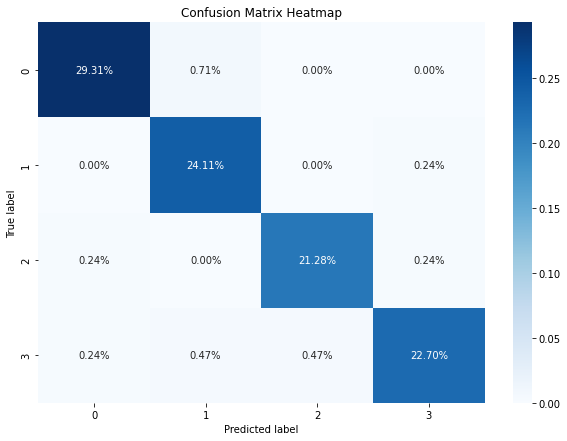

In [0]:
visualize_classification(y_test, y_pred_model_xgb)

model has high accuracy at predicting cluster so can use SHAP outcomes with confidence

### SHAP

In [0]:
# Reference: (O’Sullivan, 2022)
# Create a SHAP explainer
import shap
shap.initjs()
# shape confirms there is one shap value for every instance, feature and cluster
explainer = shap.Explainer(model_xgb)
shap_values = explainer(X_train)
print(np.shape(shap_values))

(1688, 20, 4)


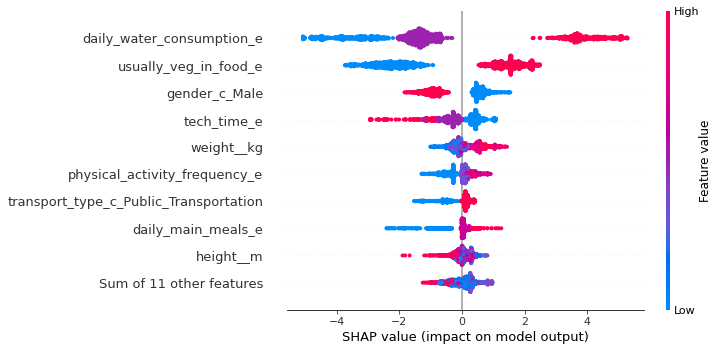

In [0]:
shap.plots.beeswarm(shap_values[:,:,0])

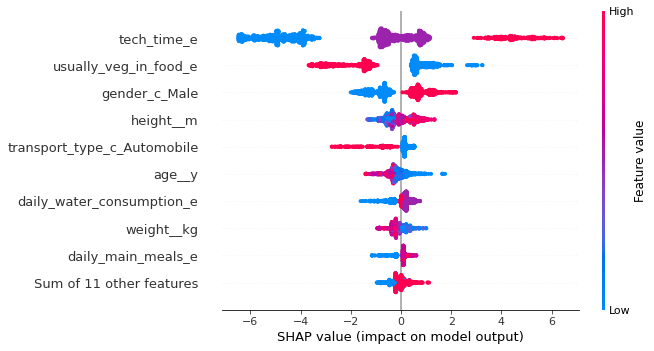

In [0]:
shap.plots.beeswarm(shap_values[:,:,1])

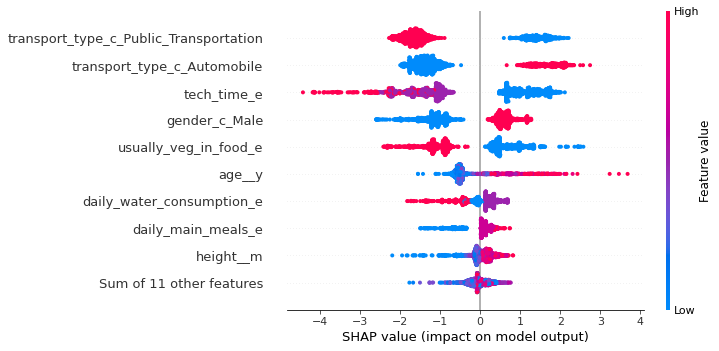

In [0]:
shap.plots.beeswarm(shap_values[:,:,2])

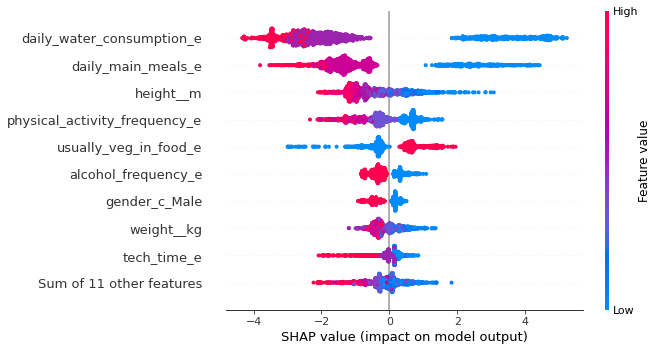

In [0]:
shap.plots.beeswarm(shap_values[:,:,3])

2 clusters each that are primarily male or female and witin these most inflential metrics are the same for gender, with many having opposing values. therfore will look a linea regression with gender sparate to see if models peform better.

# LINEAR REGRESSION

In [0]:
# set the train and test features and target, dropping weight as we know this is a direct contributor to BMI and we are interested in other features

X_train2 = df_train[allfeatures3].drop(columns=['weight__kg'])
X_test2 = df_test[allfeatures3].drop(columns=['weight__kg'])

y_train2 = df_train['bmi']
y_test2 = df_test['bmi']

print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(1688, 19)
(423, 19)
(1688,)
(423,)


In [0]:
# check that distributions in both test and train are about the same
print(X_train2['gender_c_Male'].value_counts(normalize=True))
print(X_test2['gender_c_Male'].value_counts(normalize=True))

1    0.500592
0    0.499408
Name: gender_c_Male, dtype: float64
1    0.527187
0    0.472813
Name: gender_c_Male, dtype: float64


In [0]:
# train and fit the combined model
model_xgb_reg = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
#  train the model
model_xgb_reg.fit(X_train2, y_train2)

# s generate y_pred
y_pred_model_xgb_reg = model_xgb_reg.predict(X_test2)

In [0]:
# set the train and test features and target for male and female splits

X_train_Male = df_train[df_train['gender_c_Male'] == 1][allfeatures3].drop(columns=['weight__kg'])
X_test_Male = df_test[df_test['gender_c_Male'] == 1][allfeatures3].drop(columns=['weight__kg'])

y_train_Male = df_train[df_train['gender_c_Male'] == 1]['bmi']
y_test_Male = df_test[df_test['gender_c_Male'] == 1]['bmi']



X_train_Female = df_train[df_train['gender_c_Male'] == 0][allfeatures3].drop(columns=['weight__kg'])
X_test_Female = df_test[df_test['gender_c_Male'] == 0][allfeatures3].drop(columns=['weight__kg'])

y_train_Female = df_train[df_train['gender_c_Male'] == 0]['bmi']
y_test_Female = df_test[df_test['gender_c_Male'] == 0]['bmi']

In [0]:
# train and fit the male and female models

model_xgb_male = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
#  train the model
model_xgb_male.fit(X_train_Male, y_train_Male)

#  generate y_pred
y_pred_model_xgb_male = model_xgb_male.predict(X_test_Male)



model_xgb_female = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
#  train the model
model_xgb_female.fit(X_train_Female, y_train_Female)

#  generate y_pred
y_pred_model_xgb_female = model_xgb_female.predict(X_test_Female)


In [0]:
# plot actual vs predicted BMI values

fig1 = px.scatter(x = y_test2, y =y_pred_model_xgb_reg, color_discrete_sequence=['#00586D'])
fig2 = px.scatter(x = y_test_Male, y =y_pred_model_xgb_male, color_discrete_sequence=['#00586D'])
fig3 = px.scatter(x = y_test_Female, y =y_pred_model_xgb_female, color_discrete_sequence=['#00586D'])

fig = make_subplots(
    rows=1, cols=3,
    shared_yaxes=True,
    shared_xaxes=True,
    vertical_spacing=0.02,
    subplot_titles=("Actual v Predicted BMI Combined", "Actual v Predicted BMI Male", "Actual v Predicted BMI Female")
    )

# add each trace to its specific subplot
for i in fig1.data :
    fig.add_trace(i, row=1, col=1)

for i in fig2.data :    
    fig.add_trace(i, row=1, col=2)
for i in fig3.data :    
    fig.add_trace(i, row=1, col=3)

fig.update_layout(showlegend=False, font_size=10, template="plotly_white",xaxis_title='actual', yaxis_title='predicted')
fig.show()

In [0]:
# this is a helper function that when used will return MAPE (mean_absolute_percentage_error)
# Reference: (Pountney, 2024b)
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    try:
      difference = y_true - y_pred
      actual = y_true
      absolute_pct_error = np.mean(np.abs(difference / actual)) * 100
    except Exception:
      absolute_pct_error = 0
    return np.round(absolute_pct_error, decimals=2)

In [0]:
# evaluate and compare y_test vs. y_pred
r2_score = met.r2_score(y_test2, y_pred_model_xgb_reg)
rmse = float(format(np.sqrt(met.mean_squared_error(y_test2,y_pred_model_xgb_reg)),'.3f'))
mape = mean_absolute_percentage_error(y_test2, y_pred_model_xgb_reg) 

r2_score_male = met.r2_score(y_test_Male, y_pred_model_xgb_male)
rmse_male = float(format(np.sqrt(met.mean_squared_error(y_test_Male,y_pred_model_xgb_male)),'.3f'))
mape_male = mean_absolute_percentage_error(y_test_Male, y_pred_model_xgb_male) 


r2_score_female = met.r2_score(y_test_Female, y_pred_model_xgb_female)
rmse_female = float(format(np.sqrt(met.mean_squared_error(y_test_Female,y_pred_model_xgb_female)),'.3f'))
mape_female = mean_absolute_percentage_error(y_test_Female, y_pred_model_xgb_female) 



In [0]:
# reference: (Fullegar, 2024)
data = {'Combined': [r2_score, rmse, mape],
        'Male': [r2_score_male, rmse_male, mape_male], 
        'Female':[r2_score_female, rmse_female, mape_female]} 
  
df_comp = pd.DataFrame(data) 
df_comp = df_comp.rename(index={0 : 'R squared score', 
                                1 : 'Mean Squared Error', 
                                2 : 'Mean Absolute Percentage Error' })
df_comp
acc_df = df_comp.sort_values(by = 'R squared score', axis = 1, ascending = False)
acc_df.T

R squared score 
 Mean Squared Error 
 Mean Absolute Percentage Error 
 
 
 
 
 Female 
 0.910450 
 2.831 
 6.37 
 
 
 Combined 
 0.804855 
 3.529 
 8.63 
 
 
 Male 
 0.624956 
 3.891 
 9.69

when split by gender, female model performs slightly better for R2 and rmse, however male pefomance is worse so will stick with a combined model

## SHAP to explore feature importance

In [0]:
# set up SHAP models

explainer_comb = shap.Explainer(model_xgb_reg)
shap_values_comb = explainer_comb(X_train2)

explainer_female = shap.Explainer(model_xgb_female)
shap_values_female = explainer_female(X_train_Female)


explainer_male = shap.Explainer(model_xgb_male)
shap_values_male = explainer_male(X_train_Male)


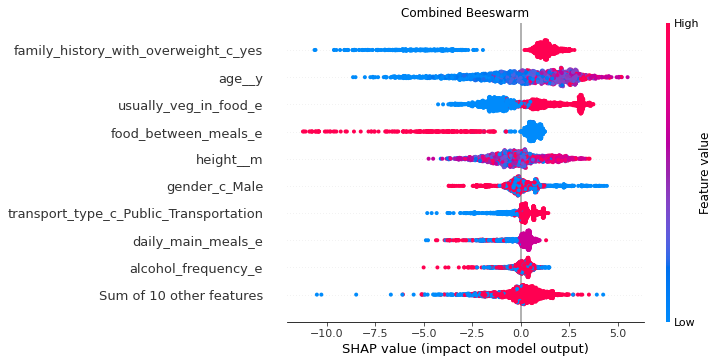

In [0]:
shap.plots.beeswarm(shap_values_comb, show=False)

plt.title("Combined Beeswarm", y=1)
plt.show()

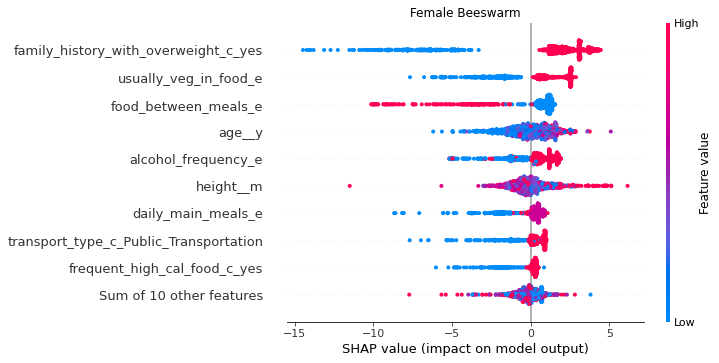

In [0]:
shap.plots.beeswarm(shap_values_female, show=False)

plt.title("Female Beeswarm", y=1)
plt.show()

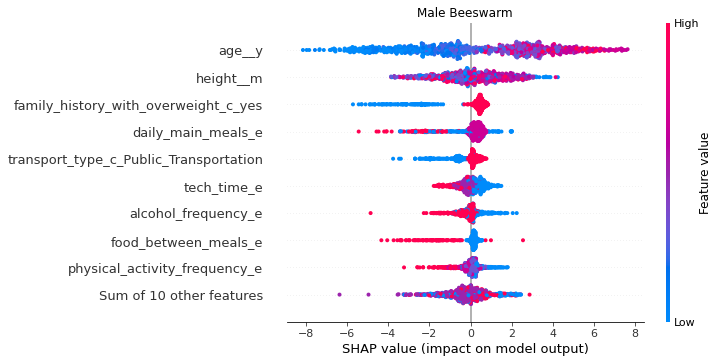

In [0]:
shap.plots.beeswarm(shap_values_male, show=False)

plt.title("Male Beeswarm", y=1)
plt.show()

# References

Dmitriy (2019) Principal Component Analysis and k-means Clustering to Visualize a High Dimensional Dataset, Medium. Available at: https://medium.com/more-python-less-problems/principal-component-analysis-and-k-means-clustering-to-visualize-a-high-dimensional-dataset-577b2a7a5fe2 (Accessed: 25 April 2025).

Fullegar, G. (2024) ‘Data Engineering’. DS_ETL_example, BPP, 27 November.

GitHub (2018) Subplot font size is hardcoded to 16pt · Issue #985, GitHub. Available at: https://github.com/plotly/plotly.py/issues/985 (Accessed: 29 April 2025).

GitHub (2023) Axis labels are not shown for all subplots when using plotly express, facets and string labels · Issue #4452 · plotly/plotly.py, GitHub. Available at: https://github.com/plotly/plotly.py/issues/4452 (Accessed: 29 April 2025).

Mahmood, Md Sohel (2021) Factor Analysis of Mixed Data, Towrds Data Science. Available at: https://towardsdatascience.com/factor-analysis-of-mixed-data-5ad5ce98663c/ (Accessed: 25 April 2025).

Plotly Community Forum (2022) Creating a subplot from 2 exisitng plots, Plotly Community Forum. Available at: https://community.plotly.com/t/creating-a-subplot-from-2-exisitng-plots/66835/4 (Accessed: 25 April 2025).

Pountney, L. (2024a) ‘Data Analytics’. Topic 3 Linear Regression, BPP, 19 June.

Pountney, L. (2024b) ‘Data Analytics’. Topic4_Log_Reg, BPP, 26 June.

Ruberts, A. (2020) K-Prototypes - Customer Clustering with Mixed Data Types, Well Enough. Available at: https://antonsruberts.github.io/kproto-audience/ (Accessed: 25 April 2025).

Stack Overflow (2022) How to use OrdinalEncoder() to set custom order? Available at: https://stackoverflow.com/questions/72170947/how-to-use-ordinalencoder-to-set-custom-order (Accessed: 22 April 2025).

The Py4DS Community (2023) 13. Exploratory Data Analysis, Python for Data Science. Available at: https://aeturrell.github.io/python4DS/exploratory-data-analysis.html (Accessed: 8 March 2025).